### **제주 동부지역 ap 접속자 예측**

wifi 데이터    
관광 입도객 데이터 (일별 데이터는 직접 생성)   
유동인구 데이터(방문)   
~비행기, 렌트비용 데이터~   
날씨 데이터    
매출데이터 (월별)  

#### 1. 사용 라이브러리

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

# 시각화 한글 폰트
import os
plt.rc("font", family="Malgun Gothic")

# 지도시각화
# pip install folium
import folium

**동부 지역 고정형 wifi 이용현황(y)**

- 5월은 05.01 ~ 05.27 데이터만 존재합니다. 

In [2]:
# ap2021 = pd.read_csv('202021.csv')
# ap2021 = ap2021[ap2021['ap_type']!='이동형']
# ap2021 = ap2021[ap2021['pt_year']==2021]

# East_jeju = ap2021[ap2021['ap_address_detail'].str.contains('조천|구좌|성산|일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]
# East_jeju.to_csv('East_jeju.csv', index=False)

In [3]:
East_jeju = pd.read_csv('East_jeju.csv')
East_jeju.head()

,base_date,user_id,mac_address,upload,download,session_time,nationality,province,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
3,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,60,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
4,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1


지역별로 나누기

In [4]:
# 조천 
Jocheon = East_jeju[East_jeju['ap_address_detail'].str.contains('조천', na=False)]

# 구좌
Gujwa = East_jeju[East_jeju['ap_address_detail'].str.contains('구좌', na=False)]

# 성산
Seongsan = East_jeju[East_jeju['ap_address_detail'].str.contains('성산', na=False)]

# 구제주 
Gujeju = East_jeju[East_jeju['ap_address_detail'].str.contains('일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]

- 동부지역 wifi 이용현황 eda로 살펴보고 
- 특징을 잡아내는 게 목표 1 
- 특징에서 주체 추출 목표 2

**동부 지역 EDA**

In [5]:
East_jeju['ap_category'].unique()

array(['공영관광지', '버스정류소', '테마거리', '광장', '전기차충전소', '사설관광지', '숲길', '올레코스',
       '공원', '해변', '체육시설', '지하상가', '요양병원', '항구', '여객터미널', '학습관', '공항',
       '학습센터', '전통시장', '박물관', '장례식장', '도서관', '다중이용시설', '공공기관', '관광지',
       '미술관', '공연장', '관공서'], dtype=object)

In [6]:
print(f'len : {len(East_jeju)}')

len : 27325901


In [7]:
list = ['공영관광지', '버스정류소', '테마거리', '광장', '전기차충전소', '사설관광지', '숲길', '올레코스',
       '공원', '해변', '체육시설', '지하상가', '요양병원', '항구', '여객터미널', '학습관', '공항',
       '학습센터', '전통시장', '박물관', '장례식장', '도서관', '다중이용시설', '공공기관', '관광지',
       '미술관', '공연장', '관공서']

In [8]:
# 21년 전체 접속횟수 
empty = []
for i in list:
    empty.append(len(East_jeju[East_jeju['ap_category']==i]))

east_df = pd.DataFrame({'장소': list, '접속횟수':empty})
east_df.sort_values('접속횟수', ascending=False)

,장소,접속횟수
1,버스정류소,15666820
8,공원,2116046
9,해변,1991190
0,공영관광지,1990743
4,전기차충전소,1537902
7,올레코스,1135057
12,요양병원,638951
2,테마거리,432488
5,사설관광지,333419
16,공항,324948


동부지역 월별/장소별 접속횟수 순위 

In [9]:
East1 = East_jeju[East_jeju['pt_month']==1]
East2 = East_jeju[East_jeju['pt_month']==2]
East3 = East_jeju[East_jeju['pt_month']==3]
East4 = East_jeju[East_jeju['pt_month']==4]
East5 = East_jeju[East_jeju['pt_month']==5]
East6 = East_jeju[East_jeju['pt_month']==6]
East7 = East_jeju[East_jeju['pt_month']==7]
East8 = East_jeju[East_jeju['pt_month']==8]
East9 = East_jeju[East_jeju['pt_month']==9]
East10 = East_jeju[East_jeju['pt_month']==10]
East11 = East_jeju[East_jeju['pt_month']==11]
East12 = East_jeju[East_jeju['pt_month']==12]

In [10]:
def month_east(df):
        empty = []
        for i in list:
            empty.append(len(df[df['ap_category']==i]))

        east_df = pd.DataFrame({'장소': list, '접속횟수':empty})
        return east_df.sort_values('접속횟수', ascending=False).iloc[:15]

In [11]:
# 1월
month_east(East1).head()

,장소,접속횟수
1,버스정류소,994375
8,공원,125900
4,전기차충전소,108870
9,해변,72480
0,공영관광지,58442


In [12]:
month_east(East2).head()

,장소,접속횟수
1,버스정류소,929613
4,전기차충전소,147558
8,공원,131126
9,해변,95249
0,공영관광지,85382


In [13]:
month_east(East2).head()

,장소,접속횟수
1,버스정류소,929613
4,전기차충전소,147558
8,공원,131126
9,해변,95249
0,공영관광지,85382


In [14]:
month_east(East3).head()

,장소,접속횟수
1,버스정류소,1258655
8,공원,159877
9,해변,136143
4,전기차충전소,136096
0,공영관광지,117877


In [15]:
month_east(East4).head()

,장소,접속횟수
1,버스정류소,1425842
8,공원,199391
9,해변,175287
0,공영관광지,157040
4,전기차충전소,127261


In [16]:
month_east(East5).head()

,장소,접속횟수
1,버스정류소,1215478
9,해변,187588
0,공영관광지,185981
8,공원,178498
4,전기차충전소,132383


In [17]:
month_east(East6).head()

,장소,접속횟수
1,버스정류소,1281676
9,해변,258501
8,공원,181512
0,공영관광지,175669
4,전기차충전소,122549


In [18]:
month_east(East7).head()

,장소,접속횟수
1,버스정류소,1498513
9,해변,243692
8,공원,209502
0,공영관광지,208588
4,전기차충전소,152405


In [19]:
month_east(East8).head()

,장소,접속횟수
1,버스정류소,1225477
9,해변,245849
0,공영관광지,229980
12,요양병원,159939
8,공원,159642


**정리**   
월별 접속장소(ap_category) 순위를 냈을 때, top5는 버정, 공영관광지, 공원, 해변, 전기차충전소   
8월에 처음으로 top5 내에 '요양병원' 등장, 최소 7위 ~ 12위에 머무르던 장소   
8월은 타 월에 비해 전체적인 접속횟수가 높음   
>
8월 15일 발표내용 중, 18일 ~ 말일까지 제주도 거리두기 4단계 격상과, 사회복지 시설 방문면회 금지, 이용인원 절반 이하 운영 (실제로 18일 전후로 방문 횟수의 큰 차이가 보임)   
H1. 격상 전 보호자들의 급한 방문? > 발표 15일, 시행 18일. 눈에 띄는 높은 접속횟수는 8월 초부터 보임   
H2. 이달부터 60세 이상 도민 대상으로 치매 조기검진 비용지원 진행 탓?   
H3. 휴가철 + 휴가내서 요양원 방문?   
H4. 제주의료원에서 코로나 병동 입원이 가능함 > 여기서? 
>
**왜 8월에 갑자기 요양병원 접속횟수가 늘었고 이후 다시 복귀되었는지**

In [20]:
month_east(East9).head()

,장소,접속횟수
1,버스정류소,1357376
0,공영관광지,227425
8,공원,162587
9,해변,142245
4,전기차충전소,128395


In [21]:
month_east(East10).head()

,장소,접속횟수
1,버스정류소,1663608
0,공영관광지,250781
8,공원,241980
9,해변,200946
7,올레코스,140223


In [22]:
month_east(East11).head()

,장소,접속횟수
1,버스정류소,1534814
8,공원,200697
0,공영관광지,168880
9,해변,136515
4,전기차충전소,129825


In [23]:
month_east(East12).head()

,장소,접속횟수
1,버스정류소,1281393
8,공원,165334
0,공영관광지,124698
4,전기차충전소,100437
9,해변,96695


In [24]:
# bustop = East_jeju[East_jeju['ap_category']=='버스정류소']
# beach = East_jeju[East_jeju['ap_category']=='해변']
# park = East_jeju[East_jeju['ap_category']=='공원']
# public = East_jeju[East_jeju['ap_category']=='공영관광지']
# electric = East_jeju[East_jeju['ap_category']=='전기차충전소']

# print(len(bustop[bustop['visit_type']=='거주']),len(bustop[bustop['visit_type']=='관광']))
# print(len(park[park['visit_type']=='거주']),len(park[park['visit_type']=='관광']))
# print(len(beach[beach['visit_type']=='거주']),len(beach[beach['visit_type']=='관광']))
# print(len(public[public['visit_type']=='거주']),len(public[public['visit_type']=='관광']))
# print(len(electric[electric['visit_type']=='거주']),len(electric[electric['visit_type']=='관광']))

In [25]:
# 각 모델(지역)마다 다른 데이터 사용해도 됩니다! 성능만 좋으면 된답니다. 

# ㄴㄴ 그럼 지역별 eda를 통해 필요 데이터를 고려해보도록 하겠습니다. 

# # 베이스라인 피팅 
# rmse, mse // accuracy(분류)  >> 
# correlation >> 찍어보고! 

**예측 AP 접속자 수 예측 대상 : 접속 순위 1위인 버스정류소**   
- 단순 접속 순위 1위
- 거주 > 관광이지만 타 top5 장소보다 관광객 접속 횟수가 큼 (도민과 관광객 모두 아우르는 장소)
- 설령 렌트카, 자차 이용자라도 접속 가능성이 있음 
- **y : 일별/지역별 버스정류소 이용객 수의 평균 ~ max**



In [26]:
East_jeju = East_jeju[East_jeju['ap_category']=='버스정류소']
East_jeju.head(3)

,base_date,user_id,mac_address,upload,download,session_time,nationality,province,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
12,20210101,79dd034114ab296e4cfe62245f35445ebe795bdeb5ef02...,fa941188aa9d3d91c673502ef784a0ba0490808675294c...,984777,32184544,327,대한민국,NaN,여성,10,거주,고정형,버스정류소,버스정류소_행원리[북],행원리(북)#1-1,33.553292,126.80781,제주시 구좌읍 행원리 728-3,2021,1
13,20210101,82863c160cee56556011d9092b6550e3d43c7ed41f1646...,fa941188aa9d3d91c673502ef784a0ba0490808675294c...,217800,19976,22,대한민국,NaN,여성,20,관광,고정형,버스정류소,버스정류소_행원리[북],행원리(북)#1-1,33.553292,126.80781,제주시 구좌읍 행원리 728-3,2021,1
14,20210101,25ca90407adb861b40a17c1b6b8dbf7e3ec3ebe983cd34...,fa941188aa9d3d91c673502ef784a0ba0490808675294c...,752807,36148726,414,대한민국,NaN,여성,10,거주,고정형,버스정류소,버스정류소_행원리[북],행원리(북)#1-1,33.553292,126.80781,제주시 구좌읍 행원리 728-3,2021,1


In [27]:
Jocheon = Jocheon[Jocheon['ap_category']=='버스정류소']
Gujwa = Gujwa[Gujwa['ap_category']=='버스정류소']
Seongsan = Seongsan[Seongsan['ap_category']=='버스정류소']
Gujeju = Gujeju[Gujeju['ap_category']=='버스정류소']

In [28]:
# AP 설치된 버스정류장 수 
print(f'조천 : {len(Jocheon["ap_place"].unique())}')
print(f'구좌 : {len(Gujwa["ap_place"].unique())}')
print(f'성산 : {len(Seongsan["ap_place"].unique())}')
print(f'구제주 : {len(Gujeju["ap_place"].unique())}')   # 구제주는 10개동 합한 지역이라 규모가 좀 더 큼

조천 : 33
구좌 : 23
성산 : 22
구제주 : 199


In [29]:
# 지역별 버스정류장 접속횟수 
print(f'조천 : {len(Jocheon)}')
print(f'구좌 : {len(Gujwa)}')
print(f'성산 : {len(Seongsan)}')
print(f'구제주 : {len(Gujeju)}')

조천 : 1314927
구좌 : 434076
성산 : 809798
구제주 : 13108019


In [30]:
# 지역별 버스정류장 wifi 이용자 수 
print(f'조천 : {len(Jocheon["user_id"].unique())}')
print(f'구좌 : {len(Gujwa["user_id"].unique())}')
print(f'성산 : {len(Seongsan["user_id"].unique())}')
print(f'구제주 : {len(Gujeju["user_id"].unique())}')

조천 : 42051
구좌 : 34485
성산 : 44450
구제주 : 152303


In [31]:
# 방문 유형별 버정 접속 횟수 
print(f'조천 거주 : {len(Jocheon[Jocheon["visit_type"]=="거주"])}')
print(f'조천 관광 : {len(Jocheon[Jocheon["visit_type"]=="관광"])}')
print()
print(f'구좌 거주 : {len(Gujwa[Gujwa["visit_type"]=="거주"])}')
print(f'구좌 관광 : {len(Gujwa[Gujwa["visit_type"]=="관광"])}')
print()
print(f'성산 거주 : {len(Seongsan[Seongsan["visit_type"]=="거주"])}')
print(f'성산 관광 : {len(Seongsan[Seongsan["visit_type"]=="관광"])}')
print()
print(f'구제주 거주 : {len(Gujeju[Gujeju["visit_type"]=="거주"])}')
print(f'구제주 관광 : {len(Gujeju[Gujeju["visit_type"]=="관광"])}')


조천 거주 : 760345
조천 관광 : 448069

구좌 거주 : 208871
구좌 관광 : 191606

성산 거주 : 316860
성산 관광 : 411549

구제주 거주 : 8368202
구제주 관광 : 3320903


## **eda**

In [32]:
# 궁금증! 
# 버정 ap 사용 연령대는?  
age_list = Seongsan['age'].unique().tolist()
empty = []

for i in age_list:
    empty.append(len(Seongsan[Seongsan['age']==i]))

df2 = pd.DataFrame({'age':age_list, 'len': empty})
df2.sort_values('len', ascending=False).head()      # 10,20,50,40,30 순으로 많다. 

# 조천, 구제는 10,20,50,40,30 순이고 
# 구좌는 50,40,10,20,30 순임 
# 성산은 50,10,20,40,30 순임 
# 학생들이 아예 없는 지역일 수도 있고, 뭔가 조건이 안 맞을 수도 있고. 

,age,len
0,50,193448
2,10,166420
4,20,165822
1,40,158742
3,30,120688


In [33]:
# 유동인구가 많은 버정에만 ap 설치되어 있음. 어떤 지역인지 보자. 
# 공공 와이파이 지역에 점 찍어서 밀집 지역 대충 그림 그려보면
# 그 밀집 지역(장소) 관련한 데이터를 찾을 수 있을 거야. 
Jocheon['ap_place'].unique()

# 거주하는 사람들이 버정 이용에 영향을 미치는 변수는 ? (외출 관련)
# 날씨 
# 월급날 
# 거리두기 단계 

array(['버스정류소_조천초등학교(조천리 새마을공장)방면)', '버스정류소_신촌초등학교[남]',
       '버스정류소_함덕농협지소(함덕리 3구방면)', '버스정류소_교래리 보건소 (교래사거리방면)',
       '버스정류소_함덕광명 샤인빌앞[동]', '버스정류소_주암주택 (조천만세동산방면)',
       '버스정류소_함덕환승정류장(함덕해수욕장)', '버스정류소_함덕비석거리[북]', '버스정류소_북촌리[북]',
       '버스정류소_성판악[동]', '버스정류소_조천만세동산(종점)', '버스정류소_조천리(조천환승정류장(조천리사무소)방면)',
       '버스정류소_신촌초등학교(종점)', '버스정류소_신흥리(마을입구), 함덕고등학교[북]', '버스정류소_해양연구소[북]',
       '버스정류소_신촌리 (신촌초등학교방면)', '버스정류소_신흥리(마을입구) 함덕고등학교[남]',
       '버스정류소_대섬입구[북]', '버스정류소_함덕리 4구 함덕환승정류장(함덕해수욕장)방면',
       '버스정류소_함덕비석거리[남]', '버스정류소_함덕농협지소[북]', '버스정류소_조천환승정류장(조천우체국)',
       '버스정류소_함덕리 3구[북]', '버스정류소_조천초등학교(대섬입구 방면)',
       '버스정류소_함덕환승정류장(함덕해수욕장)[북]', '버스정류소_함덕리 3구(함덕해수욕장방면)',
       '버스정류소_조천환승정류장(조천리사무소)', '버스정류소_함덕리(4구)(911의원방면)',
       '버스정류소_조천리(조천초등학교 방면)', '버스정류소_성판악[서]', '버스정류소_신사동[동]',
       '버스정류소_신사동[서]', '버스정류소_대섬입구[남]'], dtype=object)

**조천 버스정류장**

In [34]:
Jocheon_bustop_list = Jocheon['ap_place'].unique().tolist()
empty = []
empty2 = []

# 위도
for i in Jocheon_bustop_list:
    empty.append(Jocheon[Jocheon['ap_place']==i].iloc[:1]['ap_latitude'].values[0])
# 경도     
for i in Jocheon_bustop_list:
    empty2.append(Jocheon[Jocheon['ap_place']==i].iloc[:1]['ap_longitude'].values[0])

In [35]:
Jocheon_bustop = pd.DataFrame({'bus_stop':Jocheon_bustop_list, '위도':empty, '경도':empty2})

In [36]:
map = folium.Map(location=[Jocheon_bustop.위도.mean(), Jocheon_bustop.경도.mean()], zoom_start=11)
for i in Jocheon_bustop.index:
    folium.Marker(
    location=[Jocheon_bustop.위도[i], Jocheon_bustop.경도[i]],                                         
    popup = folium.Popup(Jocheon_bustop.bus_stop[i], max_width = 200),       
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">조천 AP설치 버스정류장</h3>'
map.get_root().html.add_child(folium.Element(title))    
map

In [37]:
# 조천 버정 접속 순위 

J_bustop_list = Jocheon['ap_place'].unique().tolist()
empty = []

for i in J_bustop_list:
    empty.append(len(Jocheon[Jocheon['ap_place']==i]))

df = pd.DataFrame({'bustop':J_bustop_list, 'len': empty})
df.sort_values('len', ascending=False).head()

,bustop,len
24,버스정류소_함덕환승정류장(함덕해수욕장)[북],120359
6,버스정류소_함덕환승정류장(함덕해수욕장),92280
12,버스정류소_신촌초등학교(종점),75843
25,버스정류소_함덕리 3구(함덕해수욕장방면),67377
2,버스정류소_함덕농협지소(함덕리 3구방면),65266


**구좌 버스정류장**

In [38]:
Gujwa_bustop_list = Gujwa['ap_place'].unique().tolist()
empty = []
empty2 = []

# 위도
for i in Gujwa_bustop_list:
    empty.append(Gujwa[Gujwa['ap_place']==i].iloc[:1]['ap_latitude'].values[0])
# 경도     
for i in Gujwa_bustop_list:
    empty2.append(Gujwa[Gujwa['ap_place']==i].iloc[:1]['ap_longitude'].values[0])

Gujwa_bustop = pd.DataFrame({'bus_stop':Gujwa_bustop_list, '위도':empty, '경도':empty2})

In [39]:
map = folium.Map(location=[Gujwa_bustop.위도.mean(), Gujwa_bustop.경도.mean()], zoom_start=11)
for i in Gujwa_bustop.index:
    folium.Marker(
    location=[Gujwa_bustop.위도[i], Gujwa_bustop.경도[i]],                                         
    popup = folium.Popup(Gujwa_bustop.bus_stop[i], max_width = 200),       
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">구좌 AP설치 버스정류장</h3>'
map.get_root().html.add_child(folium.Element(title))    
map

In [40]:
# 구좌 버정 중 제일 접속 횟수 높은 곳은? 

G_bustop_list = Gujwa['ap_place'].unique().tolist()
empty = []

for i in G_bustop_list:
    empty.append(len(Gujwa[Gujwa['ap_place']==i]))

df = pd.DataFrame({'bustop':G_bustop_list, 'len': empty})
df.sort_values('len', ascending=False).head(10)

,bustop,len
9,버스정류소_김녕환승정류장(김녕초등학교)[남],56687
13,버스정류소_대천환승정류장(세화방향)[남],37371
11,버스정류소_대천환승정류장(종점),34597
19,버스정류소_세화환승정류장[북],32285
10,버스정류소_김녕리 (남흘동방면),29956
18,버스정류소_월정리(구좌중아초등학교방면) [남],29317
17,버스정류소_세화리시장2동[북],25393
3,버스정류소_평대초등학교[서],24839
1,버스정류소_한동리[동],18317
8,버스정류소_김녕환승정류장(김녕초등학교)[북],18152


**성산 버스정류장**

In [41]:
Seongsan_bustop_list = Seongsan['ap_place'].unique().tolist()
empty = []
empty2 = []

# 위도
for i in Seongsan_bustop_list:
    empty.append(Seongsan[Seongsan['ap_place']==i].iloc[:1]['ap_latitude'].values[0])
# 경도     
for i in Seongsan_bustop_list:
    empty2.append(Seongsan[Seongsan['ap_place']==i].iloc[:1]['ap_longitude'].values[0])
Seongsan_bustop = pd.DataFrame({'bus_stop':Seongsan_bustop_list, '위도':empty, '경도':empty2})

In [42]:
map = folium.Map(location=[Seongsan_bustop.위도.mean(), Seongsan_bustop.경도.mean()], zoom_start=11)
for i in Seongsan_bustop.index:
    folium.Marker(
    location=[Seongsan_bustop.위도[i], Seongsan_bustop.경도[i]],                                         
    popup = folium.Popup(Seongsan_bustop.bus_stop[i], max_width = 200),       
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">성산 AP설치 버스정류장</h3>'
map.get_root().html.add_child(folium.Element(title))    
map

성산일출봉, 올레길(1,2,3코스) 주변

**구제주 버스정류장**

In [43]:
Gujeju_bustop_list = Gujeju['ap_place'].unique().tolist()
empty = []
empty2 = []

# 위도
for i in Gujeju_bustop_list:
    empty.append(Gujeju[Gujeju['ap_place']==i].iloc[:1]['ap_latitude'].values[0])
# 경도     
for i in Gujeju_bustop_list:
    empty2.append(Gujeju[Gujeju['ap_place']==i].iloc[:1]['ap_longitude'].values[0])
Gujeju_bustop = pd.DataFrame({'bus_stop':Gujeju_bustop_list, '위도':empty, '경도':empty2})

In [44]:
map = folium.Map(location=[Gujeju_bustop.위도.mean(), Gujeju_bustop.경도.mean()], zoom_start=11)
for i in Gujeju_bustop.index:
    folium.Marker(
    location=[Gujeju_bustop.위도[i], Gujeju_bustop.경도[i]],                                         
    popup = folium.Popup(Gujeju_bustop.bus_stop[i], max_width = 200),       
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">구제주 AP설치 버스정류장</h3>'
map.get_root().html.add_child(folium.Element(title))    
map

In [45]:
# 구제주 버정 중 제일 접속 횟수 높은 곳은? 

Gj_bustop_list = Gujeju['ap_place'].unique().tolist()
empty = []

for i in Gj_bustop_list:
    empty.append(len(Gujeju[Gujeju['ap_place']==i]))

df = pd.DataFrame({'bustop':Gj_bustop_list, 'len': empty})
df.sort_values('len', ascending=False).head()

,bustop,len
141,버스정류소_제주시청(아라방면),522283
134,버스정류소_제주중앙여자고등학교(광양방면),418809
117,버스정류소_제주여자중고등학교(광양방면),231490
153,버스정류소_인화초등학교[서],229875
80,버스정류소_고산동산(광양방면),199177


In [46]:
# 네이버 데이터랩 검색량 키워드에 활용합니다. 
# 올레길 구분은 시작지점의 법정동명 
# 접속순위 top5만 고려합니다. 

### **y 값 : (지역별) 일별 버스정류소 와이파이 접속횟수**
- wifi 데이터는 (2021년) 365일 중 354일만 존재함

In [47]:
len(East_jeju['base_date'].unique())

354

In [48]:
# 2021년 전체 일자와 비교 
date2021 = pd.read_csv('2021_date.csv')
date2021 = date2021['base_date'].tolist()
wifi = East_jeju['base_date'].unique().tolist()

for i in range(0,365):
    if date2021[i] in wifi:
        pass
    else:
        print(date2021[i]) 

20210408
20210528
20210529
20210530
20210531
20210613
20210614
20210615
20210616
20210617
20210618


Y값에 해당하는 wifi 데이터에 해당 일자가 존재하지 않으므로, 추후 데이터 가공 단계에서 해당 일자를 삭제하도록 한다.  

In [49]:
# wifi 데이터 일자 리스트 
East_jeju_list = East_jeju['base_date'].unique().tolist()
East_jeju_list.sort()

In [50]:
# 일별 (지역별) 접속횟수 

# 조천읍 Y
empty = []
for i in East_jeju_list:
    empty.append(len(Jocheon[Jocheon['base_date']==i]))

Jocheon_Y = pd.DataFrame({'base_date':East_jeju_list,'Jocheon_Y': empty})

In [51]:
# 구좌읍 Y
empty = []
for i in East_jeju_list:
    empty.append(len(Gujwa[Gujwa['base_date']==i]))

Gujwa_Y = pd.DataFrame({'base_date':East_jeju_list,'Gujwa_Y': empty})

In [52]:
# 성산읍 Y
empty = []
for i in East_jeju_list:
    empty.append(len(Seongsan[Seongsan['base_date']==i]))

Seongsan_Y = pd.DataFrame({'base_date':East_jeju_list,'Seongsan_Y': empty})

In [53]:
# 구제주 Y
empty = []
for i in East_jeju_list:
    empty.append(len(Gujeju[Gujeju['base_date']==i]))

Gujeju_Y = pd.DataFrame({'base_date':East_jeju_list,'Gujeju_Y': empty})

In [54]:
Jocheon_Y

,base_date,Jocheon_Y
0,20210101,2170
1,20210102,2199
2,20210103,1874
3,20210104,2388
4,20210105,2188
...,...,...
349,20211227,2927
350,20211228,3009
351,20211229,2819
352,20211230,2738


In [55]:
Gujwa_Y

,base_date,Gujwa_Y
0,20210101,542
1,20210102,567
2,20210103,514
3,20210104,617
4,20210105,593
...,...,...
349,20211227,1348
350,20211228,1728
351,20211229,1276
352,20211230,1923


In [56]:
Seongsan_Y

,base_date,Seongsan_Y
0,20210101,1209
1,20210102,1200
2,20210103,1210
3,20210104,1616
4,20210105,1106
...,...,...
349,20211227,1746
350,20211228,1602
351,20211229,2037
352,20211230,2144


In [57]:
Gujeju_Y

,base_date,Gujeju_Y
0,20210101,20269
1,20210102,21267
2,20210103,19246
3,20210104,25860
4,20210105,25942
...,...,...
349,20211227,34430
350,20211228,37895
351,20211229,37494
352,20211230,36675


In [58]:
# base_date 지움 
# Jocheon_Y = Jocheon_Y.drop(['base_date'], axis=1)
# Gujwa_Y = Gujwa_Y.drop(['base_date'], axis=1)
# Seongsan_Y = Seongsan_Y.drop(['base_date'], axis=1)
# Gujeju_Y = Gujeju_Y.drop(['base_date'], axis=1)

**21년 제주 유동 인구(x)**

In [59]:
#popul21 = pd.read_csv('population_2021.csv')
#popul21.head()

In [60]:
# # 동부지역 유동인구 추출

# popul21 = popul21[popul21['emd_nm'].str.contains('조천|구좌|성산|일도|이도|삼도|용담|건입|도두|화북|삼양|아라|봉개', na=False)]
# popul21.to_csv('popul21.csv', index=False)

- **제주 동부 지역 유동인구 데이터**

In [61]:
East_pop = pd.read_csv('popul21.csv')
East_pop.head()

,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
0,20210101,1,50110256,제주시 구좌읍,여성,0,771.0076,17.3356,138.6852,제주,2021,1
1,20210101,1,50110256,제주시 구좌읍,여성,0,0.0000,11.2069,117.6718,그외,2021,1
2,20210101,1,50110256,제주시 구좌읍,여성,10,596.1920,13.2487,105.9897,제주,2021,1
3,20210101,1,50110256,제주시 구좌읍,여성,10,0.0000,8.8325,92.7410,그외,2021,1
4,20210101,1,50110256,제주시 구좌읍,여성,20,420.0650,11.3531,167.4583,제주,2021,1


In [62]:
# # 가공 방법 시각화를 위한 컬럼 스타일 지정 (캡쳐해서 보고서에 붙이세요)
# def color_cell(x,color):
#     color=f'background-color:{color}'
#     return color

# pop_example = East_pop[(East_pop['base_date']==20210101)&(East_pop['emd_nm']=='제주시 구좌읍')]
# pop_example.head().style.applymap(color_cell, color='#ff9090', subset=pd.IndexSlice[:10,['time','sex','age','resd']])

In [63]:
East_pop[(East_pop['base_date']==20210101)&(East_pop['emd_nm']=='제주시 구좌읍')]

,base_date,time,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,pt_year,pt_month
0,20210101,1,50110256,제주시 구좌읍,여성,0,771.0076,17.3356,138.6852,제주,2021,1
1,20210101,1,50110256,제주시 구좌읍,여성,0,0.0000,11.2069,117.6718,그외,2021,1
2,20210101,1,50110256,제주시 구좌읍,여성,10,596.1920,13.2487,105.9897,제주,2021,1
3,20210101,1,50110256,제주시 구좌읍,여성,10,0.0000,8.8325,92.7410,그외,2021,1
4,20210101,1,50110256,제주시 구좌읍,여성,20,420.0650,11.3531,167.4583,제주,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13993,20210101,24,50110256,제주시 구좌읍,남성,60,0.0000,37.7691,127.0415,그외,2021,1
13994,20210101,24,50110256,제주시 구좌읍,남성,70,703.0355,8.0347,4.0173,제주,2021,1
13995,20210101,24,50110256,제주시 구좌읍,남성,70,0.0000,8.0347,32.1388,그외,2021,1
13996,20210101,24,50110256,제주시 구좌읍,남성,80,573.8452,4.7692,2.3846,제주,2021,1


In [64]:
len(East_pop[(East_pop['base_date']==20210101)&(East_pop['emd_nm']=='제주시 구좌읍')])

864

- 시간별 유동인구 > 일별 유동인구로 
- 평균

In [65]:
# # 방법1
# East_pop = East_pop.groupby(['base_date','emd_nm']).agg({"resd_pop_cnt":"sum", "work_pop_cnt":"sum", "visit_pop_cnt":"sum"}, unstack = False)
# East_pop

# johnny : unstack = False 
# groupby > unstack > lambda 함수 적용 가능 
# https://ds-imh.tistory.com/9


In [66]:
# # 방법2
# East_pop = East_pop.groupby(['base_date','emd_nm']).agg({"resd_pop_cnt":"sum", "work_pop_cnt":"sum", "visit_pop_cnt":"sum"}).unstack()
# East_pop

In [67]:
# 방법3. 
# 1개씩 df 만들어서 merge / concat 

Resd_pop = East_pop.groupby(['base_date','emd_nm'])['resd_pop_cnt'].sum().unstack()
Resd_pop = Resd_pop.reset_index(drop=False)

Work_pop = East_pop.groupby(['base_date','emd_nm'])['work_pop_cnt'].sum().unstack()
Work_pop = Work_pop.reset_index(drop=False)

Visit_pop = East_pop.groupby(['base_date','emd_nm'])['visit_pop_cnt'].sum().unstack()
Visit_pop = Visit_pop.reset_index(drop=False)

In [68]:
Resd_pop.head()

emd_nm,base_date,서귀포시 성산읍,제주시 건입동,제주시 구좌읍,제주시 도두동,제주시 봉개동,제주시 삼도1동,제주시 삼도2동,제주시 삼양동,제주시 아라동,제주시 용담1동,제주시 용담2동,제주시 이도1동,제주시 이도2동,제주시 일도1동,제주시 일도2동,제주시 조천읍,제주시 화북동
0,20210101,368101.7774,201099.9105,337456.2761,33954.1604,116375.7640,277781.6432,122133.5246,655895.8565,1.109268e+06,176530.1516,285687.6354,220056.5967,1.379646e+06,36431.7375,769543.6588,547903.3586,686677.1744
1,20210102,354237.0545,193696.4436,329979.9702,32639.8008,111297.5586,265410.8961,117217.4123,630191.3054,1.073512e+06,168363.2238,271044.9449,217344.5378,1.350384e+06,34647.5481,746335.3557,529778.2155,668772.7522
2,20210103,347681.2613,197022.5338,332694.8268,31789.8887,114403.2186,268018.3260,119467.0212,647850.3490,1.095233e+06,171701.1308,277620.9111,222263.7772,1.372644e+06,35205.2093,758638.5799,539592.3234,684494.6451
3,20210104,336680.2543,178939.7190,323949.2606,28932.0483,105903.9611,250929.4451,110461.3886,603440.7458,1.051713e+06,157981.8441,255676.4000,208307.2346,1.312497e+06,31576.9191,704711.9105,508952.5925,640112.7976
4,20210105,343659.8841,177342.9943,323387.0731,30209.8042,105484.7228,255311.6097,110835.0464,608894.9085,1.052558e+06,158650.0893,258997.8332,209117.6996,1.312393e+06,32491.5189,705849.7278,507364.9848,642730.0393


In [69]:
# 864으로 나눠 평균 구하기 (성별(2)x나이(9)x출신(2)x시간(24))
def div_864(x):
    x = x/864
    return x 

In [72]:
# 구좌 일별 유동인구 train (Series)
resd_gujwa = Resd_pop['제주시 구좌읍']
resd_gujwa = resd_gujwa.map(div_864)

work_gujwa = Work_pop['제주시 구좌읍']
work_gujwa = work_gujwa.map(div_864)

visit_gujwa = Visit_pop['제주시 구좌읍']
visit_gujwa = visit_gujwa.map(div_864)

In [73]:
# 구좌 일별 유동인구 train 데이터 완성. 
Gujwa_pop = pd.DataFrame({'resd_pop' : resd_gujwa, 'work_pop' : work_gujwa, 'visit_pop' : visit_gujwa})
Gujwa_pop = Gujwa_pop.round(0).astype(int)
Gujwa_pop

,resd_pop,work_pop,visit_pop
0,391,22,175
1,382,23,172
2,385,22,160
3,375,33,131
4,374,33,134
...,...,...,...
360,376,38,209
361,372,39,236
362,368,35,241
363,371,36,261


In [75]:
# 성산 
resd_seongsan = Resd_pop['서귀포시 성산읍']
work_seongsan = Work_pop['서귀포시 성산읍']
visit_seongsan = Visit_pop['서귀포시 성산읍']

resd_seongsan = resd_seongsan.map(div_864)
work_seongsan = work_seongsan.map(div_864)
visit_seongsan = visit_seongsan.map(div_864)

Seongsan_pop = pd.DataFrame({'resd_pop' : resd_seongsan, 'work_pop' : work_seongsan, 'visit_pop' : visit_seongsan})
Seongsan_pop = Seongsan_pop.round(0).astype(int)
Seongsan_pop

,resd_pop,work_pop,visit_pop
0,426,26,188
1,410,25,179
2,402,23,153
3,390,28,134
4,398,29,130
...,...,...,...
360,394,34,268
361,381,33,286
362,384,33,296
363,390,35,306


In [76]:
# 조천 
resd_jocheon = Resd_pop['제주시 조천읍']
work_jocheon = Work_pop['제주시 조천읍']
visit_jocheon = Visit_pop['제주시 조천읍']

resd_jocheon = resd_jocheon.map(div_864)
work_jocheon = work_jocheon.map(div_864)
visit_jocheon = visit_jocheon.map(div_864)

Jocheon_pop = pd.DataFrame({'resd_pop' : resd_jocheon, 'work_pop' : work_jocheon, 'visit_pop' : visit_jocheon})
Jocheon_pop = Jocheon_pop.round(0).astype(int)
Jocheon_pop

,resd_pop,work_pop,visit_pop
0,634,34,249
1,613,41,261
2,625,38,246
3,589,54,222
4,587,55,206
...,...,...,...
360,565,62,309
361,551,63,347
362,555,64,352
363,550,65,364


In [77]:
# 구제주
Resd_pop_gujeju = Resd_pop.drop(['서귀포시 성산읍', '제주시 구좌읍', '제주시 조천읍'], axis=1)
Work_pop_gujeju = Work_pop.drop(['서귀포시 성산읍', '제주시 구좌읍', '제주시 조천읍'], axis=1)
Visit_pop_gujeju = Visit_pop.drop(['서귀포시 성산읍', '제주시 구좌읍', '제주시 조천읍'], axis=1)

resd_gujeju = Resd_pop_gujeju.sum(axis=1)
work_gujeju = Work_pop_gujeju.sum(axis=1)
visit_gujeju = Visit_pop_gujeju.sum(axis=1)

resd_gujeju = resd_gujeju.map(div_864)
work_gujeju = work_gujeju.map(div_864)
visit_gujeju = visit_gujeju.map(div_864)

Gujeju_pop = pd.DataFrame({'resd_pop' : resd_gujeju, 'work_pop' : work_gujeju, 'visit_pop' : visit_gujeju})
Gujeju_pop = Gujeju_pop.round(0).astype(int)
Gujeju_pop

,resd_pop,work_pop,visit_pop
0,30418,23750,25654
1,30198,23783,25799
2,30332,23747,25678
3,29920,23980,25898
4,29943,23979,25897
...,...,...,...
360,29555,24105,26421
361,29401,24113,26513
362,29405,24094,26562
363,29391,24090,26637


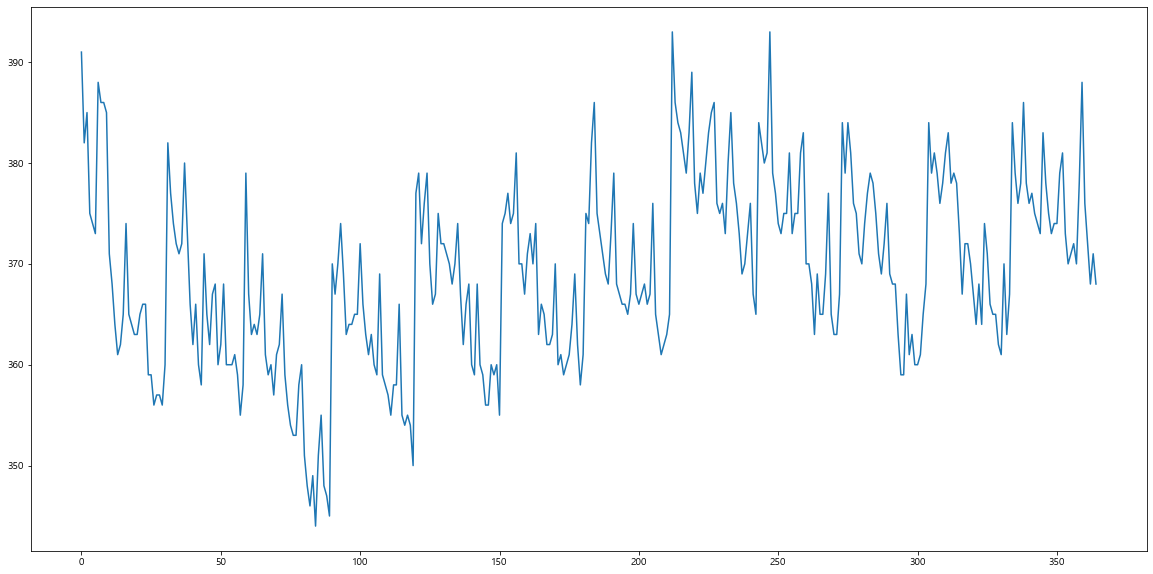

In [ ]:
# 구좌 거주 유동인구 시각화
# 잠깐 내려갔다가 다시 반등함 
x = Gujwa_pop.index
y = Gujwa_pop['resd_pop']
y2 = Gujwa_pop['work_pop']
y3 = Gujwa_pop['visit_pop']

plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

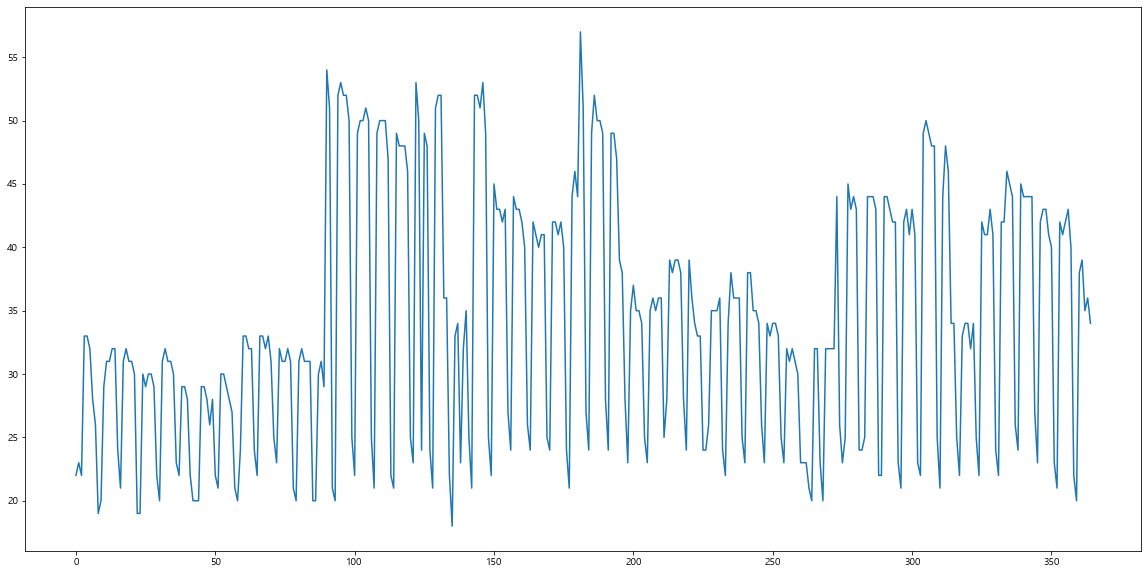

In [ ]:
# 구좌 근무인구
plt.figure(figsize=(20,10))
plt.plot(x,y2)
plt.show()

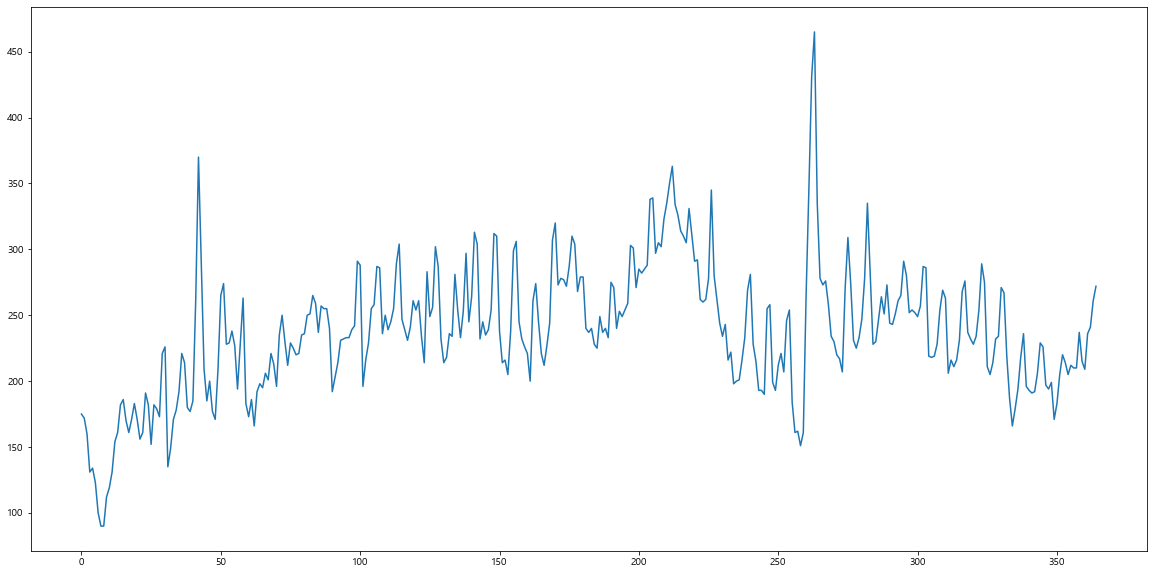

In [ ]:
# 구좌 방문인구 
plt.figure(figsize=(20,10))
plt.plot(x,y3)
plt.show()

**21년 제주 입도관광객 현황**

In [78]:
Visit = pd.read_csv('21년_입도관광객현황.csv')
Visit

,base_date,local_in,foreigner_in
0,20210101,15261,95
1,20210102,9412,75
2,20210103,12135,70
3,20210104,11833,61
4,20210105,10939,65
...,...,...,...
360,20211227,39472,143
361,20211228,36086,143
362,20211229,38774,138
363,20211230,41023,122


In [79]:
Visit_p = Visit[['local_in','foreigner_in']]
Visit_p['visit_jeju'] = Visit.sum(axis=1)
Visit_p

,local_in,foreigner_in,visit_jeju
0,15261,95,20225457
1,9412,75,20219589
2,12135,70,20222308
3,11833,61,20221998
4,10939,65,20221109
...,...,...,...
360,39472,143,20250842
361,36086,143,20247457
362,38774,138,20250141
363,41023,122,20252375


In [80]:
Visit['visit_jeju'] = Visit_p['visit_jeju']
Visit = Visit.drop(['local_in', 'foreigner_in'], axis=1)
Visit

,base_date,visit_jeju
0,20210101,20225457
1,20210102,20219589
2,20210103,20222308
3,20210104,20221998
4,20210105,20221109
...,...,...
360,20211227,20250842
361,20211228,20247457
362,20211229,20250141
363,20211230,20252375


In [ ]:
# base_date = visit['base_date'].tolist()
# base_date = pd.DataFrame({'base_date':base_date})
# base_date.to_csv('2021_date.csv', index=False)

1월 ~ 12월로 올수록 수가 올라가고 있고 22년 데이터를 봐도 꾸준히 오르고 잇음    
코로나 특수 데이터가 필요함 , 사람들의 여행욕구 그런 것도 필요하고 >> 언급량 크롤링? >> 검색?? 


**지역별 명소 검색량**   
지도시각화 시 확인가능했던 AP 설치된 버스정류장 근처 지역명소를 네이버에 검색한 일일 횟수    

In [ ]:
# 올레길 구분은 시작지점의 법정동명 
# 접속순위 top5만 고려합니다. 

# 구제주 
# + olle 18

# 조천 
# 함덕 해수욕장 : 함덕바다,함덕해변,함덕해수욕장
# + olle 19

# 구좌 
# 김녕 해수욕장 : 김녕바다,김녕해변,김녕해수욕장
# 세화 해수욕장 : 세화바다,세화해변,세화해수욕장
# 비자림 : 비자림,비자림숲,제주비자림,제주비자림숲
# + olle 20, 21 

# 성산
# 성산일출봉 : 성산일출봉,제주성산일출봉
# + olle 1,2,3

# 올레길 키워드 
# 올레n,올레길n,올레코스n,올레길코스n,올레n코스,올레길n코스,제주올레n,제주올레길n,제주올레코스n,제주올레길코스n,제주올레n코스,제주올레길n코스
# nm올레,nm올레길,nm올레코스,nm올레길코스

In [81]:
Search = pd.read_csv('East_jeju_naver검색량.csv')
Search.head()

,base_date,olle_1,olle_2,olle_3,olle_18,olle_19,olle_20,olle_21,성산일출봉,김녕바다,세화바다,비자림,함덕바다,올레_123,올레_18,올레_19,올레_2021
0,20210101,22,11,12,29,20,18,19,39,4,2,10,11,1,0,0,0
1,20210102,32,9,14,27,13,23,27,25,4,2,12,10,1,0,0,0
2,20210103,26,16,12,25,35,15,22,26,3,2,10,10,0,0,25,0
3,20210104,21,10,5,10,16,15,15,28,3,1,10,10,0,0,0,0
4,20210105,18,10,5,25,13,10,10,24,3,2,10,8,0,0,0,0


In [82]:
Jocheon_search = Search[['base_date', '함덕바다', 'olle_19', '올레_19']]
Gujwa_search = Search[['base_date', '김녕바다', '세화바다', '비자림', 'olle_20', 'olle_21', '올레_2021']]
Seongsan_search = Search[['base_date', '성산일출봉', 'olle_1', 'olle_2', 'olle_3', '올레_123']]
Gujeju_search = Search[['base_date', 'olle_18', '올레_18']]

In [83]:
Gujwa_search

,base_date,김녕바다,세화바다,비자림,olle_20,olle_21,올레_2021
0,20210101,4,2,10,18,19,0
1,20210102,4,2,12,23,27,0
2,20210103,3,2,10,15,22,0
3,20210104,3,1,10,15,15,0
4,20210105,3,2,10,10,10,0
...,...,...,...,...,...,...,...
360,20211227,8,3,27,31,23,0
361,20211228,8,4,28,23,18,0
362,20211229,8,4,30,20,29,0
363,20211230,8,3,28,27,29,0


In [84]:
# base_date 지움 
Jocheon_search = Jocheon_search.drop(['base_date'], axis=1)
Gujwa_search = Gujwa_search.drop(['base_date'], axis=1)
Seongsan_search = Seongsan_search.drop(['base_date'], axis=1)
Gujeju_search = Gujeju_search.drop(['base_date'], axis=1)

#### **X, Y 데이터 생성**

In [ ]:
# X 사용 데이터 (df 대문자)
# 유동인구 Region_pop
# 입도관광객 Visit
# 검색량 Region_search 

In [85]:
# 조천 
Jocheon_X = pd.concat([Visit, Jocheon_pop, Jocheon_search], axis=1)
Jocheon_X

,base_date,visit_jeju,resd_pop,work_pop,visit_pop,함덕바다,olle_19,올레_19
0,20210101,20225457,634,34,249,11,20,0
1,20210102,20219589,613,41,261,10,13,0
2,20210103,20222308,625,38,246,10,35,25
3,20210104,20221998,589,54,222,10,16,0
4,20210105,20221109,587,55,206,8,13,0
...,...,...,...,...,...,...,...,...
360,20211227,20250842,565,62,309,27,44,0
361,20211228,20247457,551,63,347,31,38,0
362,20211229,20250141,555,64,352,32,32,0
363,20211230,20252375,550,65,364,32,23,0


In [86]:
# 구좌 
Gujwa_X = pd.concat([Visit, Gujwa_pop, Gujwa_search], axis=1)
Gujwa_X

,base_date,visit_jeju,resd_pop,work_pop,visit_pop,김녕바다,세화바다,비자림,olle_20,olle_21,올레_2021
0,20210101,20225457,391,22,175,4,2,10,18,19,0
1,20210102,20219589,382,23,172,4,2,12,23,27,0
2,20210103,20222308,385,22,160,3,2,10,15,22,0
3,20210104,20221998,375,33,131,3,1,10,15,15,0
4,20210105,20221109,374,33,134,3,2,10,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...
360,20211227,20250842,376,38,209,8,3,27,31,23,0
361,20211228,20247457,372,39,236,8,4,28,23,18,0
362,20211229,20250141,368,35,241,8,4,30,20,29,0
363,20211230,20252375,371,36,261,8,3,28,27,29,0


In [87]:
# 성산
Seongsan_X = pd.concat([Visit, Seongsan_pop, Seongsan_search], axis=1)
Seongsan_X

,base_date,visit_jeju,resd_pop,work_pop,visit_pop,성산일출봉,olle_1,olle_2,olle_3,올레_123
0,20210101,20225457,426,26,188,39,22,11,12,1
1,20210102,20219589,410,25,179,25,32,9,14,1
2,20210103,20222308,402,23,153,26,26,16,12,0
3,20210104,20221998,390,28,134,28,21,10,5,0
4,20210105,20221109,398,29,130,24,18,10,5,0
...,...,...,...,...,...,...,...,...,...,...
360,20211227,20250842,394,34,268,66,32,13,12,0
361,20211228,20247457,381,33,286,72,41,9,10,0
362,20211229,20250141,384,33,296,71,39,13,17,0
363,20211230,20252375,390,35,306,75,35,14,11,1


In [88]:
# 구제주 
Gujeju_X = pd.concat([Visit, Gujeju_pop, Gujeju_search], axis=1)
Gujeju_X

,base_date,visit_jeju,resd_pop,work_pop,visit_pop,olle_18,올레_18
0,20210101,20225457,30418,23750,25654,29,0
1,20210102,20219589,30198,23783,25799,27,0
2,20210103,20222308,30332,23747,25678,25,0
3,20210104,20221998,29920,23980,25898,10,0
4,20210105,20221109,29943,23979,25897,25,0
...,...,...,...,...,...,...,...
360,20211227,20250842,29555,24105,26421,39,0
361,20211228,20247457,29401,24113,26513,31,0
362,20211229,20250141,29405,24094,26562,37,0
363,20211230,20252375,29391,24090,26637,44,0


In [ ]:
stop

< 추가 수집 데이터 >   
- top5 해당하는 버정 승차,환승,하차(이용)인원 
- 거리두기단계
- 공휴일유무 
- 날씨 
- 그 외 : 공휴일 유무, 요일, 등등 


-------------------------

**제주 도착 여객기 댓수**

In [ ]:
# 항공 정보 포탈 시스템 크롤링
# https://2island.medium.com/python-selenium%EC%9C%BC%EB%A1%9C-%EC%9B%B9%EC%82%AC%EC%9D%B4%ED%8A%B8-%ED%81%AC%EB%A1%A4%EB%A7%81%ED%95%98%EA%B8%B0-2-%EC%9B%B9-%EC%82%AC%EC%9D%B4%ED%8A%B8-%EC%A0%9C%EC%96%B4%ED%95%B4%EB%B3%B4%EA%B8%B0-1ffc5e05179d
# 셀레니움으로 화면 조작
# https://wikidocs.net/149358

- 크롬 드라이버 설치 및 불러오기

In [ ]:
http://bus.jeju.go.kr/search/line?searchText=202 ?? 

In [ ]:
# pip install selenium

In [ ]:
import requests
from urllib.parse import quote
from bs4 import BeautifulSoup
from selenium.webdriver.support.select import Select # ? 

In [ ]:
# 파이썬 설치경로 확인 > chrome driver의 설치경로로 선택 
import os
import sys
print(os.path.dirname(sys.executable))

C:\Users\CPB06GameN\anaconda3


In [ ]:
from selenium import webdriver
url = 'https://www.airportal.go.kr/life/airinfo/RbHanFrmMain.jsp'
driver = webdriver.Chrome('C:/Users/CPB06GameN/chromedriver')
driver.get(url)

In [ ]:
# 이사님이 찾아주신 request url 
# https://www.airportal.go.kr/life/airinfo/RbHanList.jsp?gubun=c_getList&depArr=A&current_date=20220408&airport=RKSI&al_icao=&fp_id=

- 태그 탐색 / 웹 요소 제어

In [ ]:
# 일별 검색 후 전체 몇 건인지만 확인 
# 도착, 지연, 취소, 결측치 확인  
# try / except (page)

In [ ]:
# copy selector 
# 세환님 
# driver.find_element_by_css_selector('body > form > table > tbody > tr > td:nth-child(2) > table > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child(2) > td > table > tbody > tr:nth-child(1) > td:nth-child(3)').click()

#body > form > table > tbody > tr > td:nth-child(2) > table > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child(2) > td > table > tbody > tr:nth-child(1) > td:nth-child(2) > input[type=radio]:nth-child(2)

In [ ]:
# # 출발공항
# driver.find_element_by_xpath("//option[@value='지역선택']").click()
# driver.find_element_by_xpath("//option[@value='국가선택']").click()
# driver.find_element_by_xpath("//option[@value='공항선택']").click()
# # 도착공항
# driver.find_element_by_xpath("//option[@value='동북아시아']").click()
# driver.find_element_by_xpath("//option[@value='한국']").click()
# driver.find_element_by_xpath("//option[@value='제주']").click()

# # 기간

# # 용도
# driver.find_element_by_xpath("//option[@value='여객']").click()

# # 항공사 
# driver.find_element_by_xpath("//option[@value='ALL']").click()


In [ ]:
# # 출발/도착 공항 함수 (전체 / '동북아시아', '한국', '제주')

# def arr_region(region):
#     region = driver.find_element_by_xpath("//option[@value='" + str(region) + "']")
#     region.click()

# def arr_nation(nation):
#     nation = driver.find_element_by_xpath("//option[@value='" + str(nation) + "']")
#     nation.click()

# def arr_city(city):
#     city = driver.find_element_by_xpath("//option[@value='" + str(city) + "']")
#     city.click()

In [ ]:
# 기간 ( 2021.01.01 ~ 2021.12.31)

# 전부 안됨 
# driver.find_element_by_id("current_dt_from").get_attribute("value")
# driver.find_element_by_xpath('//*[@id="current_dt_from"]')

In [ ]:
# driver = driver.find_element_by_xpath('//*[@id="current_dt_from"]').click()
# driver.send_keys('20210101')

# driver = driver.find_element_by_xpath('//*[@id="current_dt_to"]').click()
# driver.send_keys('20210101')

In [ ]:
# driver = driver.find_element_by_name('current_dt_from.hasDatepicker').click()
# driver.send_keys('2021-01-01')

# driver = driver.find_element_by_name('current_dt_to.hasDatepicker').click()
# driver.send_keys('2021-01-01')

In [ ]:
# # 용도 함수 ('여객')

# def usage(usage):
#     usage = driver.find_element_by_xpath("//option[@value='" + str(region) + "']")
#     usage.click()

In [ ]:
# # 항공사 함수('ALL')

# def airline(airline):
#     airline = driver.find_element_by_xpath("//option[@value='" + str(region) + "']")
#     airline.click()

- 도착일 태그 찾기

In [ ]:
tds = soup.select()

**21년 일일별 날씨**

In [ ]:
# 기상관측소 코드 api 
# https://www.jejudatahub.net/data/view/data/ENVIRONMENT/578

# 기상특보 자료 
# https://data.kma.go.kr/data/weatherReport/wsrList.do?pgmNo=647
# 포기! 

# 이진법으로 태풍O, 안 태풍 이런 거 하되 너무 산발적인 데이터는 X

In [ ]:
# weather21 = pd.read_csv('weather_21.csv')
# weather21.head()

In [ ]:
# 동부 지역 날씨만 추출할 수 있도록 관측소 코드 api 연결 필요
# 동부 지역 커버하는 관측소만 뽑고 결측값 처리 
# or
# 기상특보 데이터만 원 데이터에 추가할지 생각

In [ ]:
weather21.isna().sum()


base_date                         0
observatory_code                  0
average_temperature              57
lowest_temperature               58
lowest_temperature_time          58
highest_temperature              58
highest_temperature_time         58
daily_rainfall                   16
maximum_wind_speed              115
maximum_wind_speed_time         115
average_wind_speed              142
maximum_wind_speed_direction    118
pt_year                           0
pt_month                          0
dtype: int64

In [ ]:
weather21['observatory_code'].unique()

array([328, 329, 330, 724, 725, 726, 727, 751, 752, 753, 779, 780, 781,
       782, 792, 793, 855, 861, 862, 863, 865, 866, 867, 868, 869, 870,
       871, 880, 883, 884, 885, 890, 892, 893, 965, 980], dtype=int64)

In [ ]:
import requests
from urllib.parse import quote

with open('jejudatahubkey.txt') as file: 
    hub_key = file.read()

In [ ]:
# url = f'https://open.jejudatahub.net/api/proxy/t1bab75a555a15715btaa7a5abaa1aab/{hub_key}?{params(key=value)}'
# url

NameError: name 'params' is not defined

In [ ]:
East_jeju

,base_date,user_id,mac_address,upload,download,session_time,nationality,province,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
3,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,60,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
4,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325896,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,325702,212181,1340,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325897,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,258553,126722,142,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325898,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,36665,40569,10,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325899,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,25203,13261,441,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12


In [ ]:
# 전체적으로 순위
# 나이대별 순위 
# 월별로 순위 바뀌는지 

In [ ]:
# wifi 데이터 장소 별 접속 순위 
place = East_jeju['ap_place'].unique().tolist()
empty = []

for i in place:
    place_len = len(East_jeju[East_jeju['ap_place']==i])
    empty.append(place_len)

NameError: name 'East_jeju' is not defined

**버스 노선 확인할 수 있는 방법**   

**입도 관광객 데이터 가상으로 만들기**

In [ ]:
# df화
usage = pd.DataFrame({'장소': place, '접속횟수':empty})
# 데이터 프레임 정렬 
usage.sort_values('접속횟수', ascending=False).iloc[:30]

,장소,접속횟수
67,함덕 서우봉 해변,568313
436,제주의료원,559414
364,버스정류소_제주시청(아라방면),522283
17,성산일출봉,513851
96,절물자연휴양림,437018
21,광치기해변,427033
349,버스정류소_제주중앙여자고등학교(광양방면),418809
77,19코스,394466
142,제주국제공항,324948
95,20코스,288396


In [ ]:
East_jeju

,base_date,user_id,mac_address,upload,download,session_time,nationality,province,gender,age,visit_type,ap_type,ap_category,ap_place,ap_place_detail,ap_latitude,ap_longitude,ap_address_detail,pt_year,pt_month
0,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
1,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,88,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
2,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,328,0,2,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
3,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,60,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
4,20210101,25ee972873bbca5a135a33c6ba4d970dd48542ba2e79d7...,49288eca91187e2aacea777790f494ff3863d5fd61aed9...,28,0,1,미국,NaN,남성,50,거주,고정형,공영관광지,모구리야영장,모구리야영장 #1,33.406581,126.821853,서귀포시 성산읍 난산리 2960-1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325896,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,325702,212181,1340,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325897,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,258553,126722,142,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325898,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,36665,40569,10,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12
27325899,20211226,3917010b69b791d420c727fbf567e20be33c745f7e41b2...,b69a57147d04a023d35c11b493cdbf7a0e82f05090e260...,25203,13261,441,대한민국,NaN,남성,20,거주,고정형,도서관,기적의 도서관,기적의 도서관 #1-1,33.501880,126.535570,제주시 이도이동 1128-1(동광로 12길 19),2021,12


In [ ]:
# 21년 동부지역 공공 와이파이 접속 횟수 
print(f'접속횟수 : {len(East_jeju)}')

# 21년 동부지역 공공 와이파이 이용객 수 
print(f'이용객 수 : {len(East_jeju["user_id"].unique())}')

접속횟수 : 27325901
이용객 수 : 205864


In [ ]:
# 21년 고정+이동형 데이터 

ap2021 = pd.read_csv('202021.csv')

KeyboardInterrupt: 